In [1]:
#importar librerias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:

# Cargar el archivo CSV
ruta = r"C:\Users\anaco\OneDrive\Documentos\Master DADS\Proyecto\emocion_valoraciones_con_visitante.csv"
df = pd.read_csv(ruta)
df.head()

t_id  emocion           fecha_hora  valoracion  \
0  Training_10118481.jpg  enojado  2022-09-13 10:00:00           2   
1  Training_10120469.jpg  enojado  2022-09-19 00:00:00           6   
2  Training_10131352.jpg  enojado  2022-09-22 02:00:00           0   
3  Training_10161559.jpg  enojado  2022-10-01 02:00:00           4   
4   Training_1021836.jpg  enojado  2022-09-13 20:00:00           6   

  procedencia  id_visitante        tipo_entrada  coste  antelacion_de_compra  \
0   Filipinas             3          pase anual  14.00                     0   
1       India             4  entrada individual  13.79                   113   
2      Espa√±a             5    entrada infantil  19.06                    25   
3      Espa√±a             6  entrada individual  17.72                   320   
4      Canad√°             7  entrada individual  20.50                   271   

                 atraccion  comienzo_atraccion  tiempo_de_espera  \
0  Monta√±a Rusa de la Luna               291.0                 5   
1       Carrusel Encantado               425.0                11   
2      Cine 4D Emocionante               499.0                13   
3     Fiesta de los Dulces               715.0                12   
4    Tobog√°n del Arco Iris               301.0                17   

  comienzo_atraccion_fecha_hora  duracion  
0           2022-09-13 10:00:00       308  
1           2022-09-19 00:00:00       103  
2           2022-09-22 02:00:00       371  
3           2022-10-01 02:00:00       228  
4           2022-09-13 20:00:00       247

In [3]:
# Ver tipos de datos y conteo de nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

print("\nTipos de datos:")
print(df.dtypes)

Valores nulos por columna:
t_id                                0
emocion                           351
fecha_hora                          2
valoracion                          0
procedencia                         0
id_visitante                        0
tipo_entrada                        0
coste                               0
antelacion_de_compra                0
atraccion                        1138
comienzo_atraccion                 96
tiempo_de_espera                    0
comienzo_atraccion_fecha_hora      96
duracion                            0
dtype: int64

Tipos de datos:
t_id                              object
emocion                           object
fecha_hora                        object
valoracion                         int64
procedencia                       object
id_visitante                       int64
tipo_entrada                      object
coste                            float64
antelacion_de_compra               int64
atraccion                         object
c

In [4]:
# Eliminar filas sin emoci√≥n (target)
df = df.dropna(subset=['emocion'])

# Confirmar que ya no hay nulos en la target
print(df['emocion'].isnull().sum())
print(f"Filas restantes: {len(df)}")

0
Filas restantes: 35536


In [5]:
# Conteo de clases de la emoci√≥n
print("Distribuci√≥n de la variable 'emocion':")
print(df['emocion'].value_counts(dropna=False))

Distribuci√≥n de la variable 'emocion':
emocion
feliz       8901
neutral     6139
triste      6019
miedo       5075
enojado     4906
sorpresa    3953
asco         543
Name: count, dtype: int64


## üìå Observaciones clave sobre la variable target `emocion`

- Est√° **desbalanceada**: la clase `"feliz"` tiene m√°s de **8900 ejemplos**.
- La clase `"asco"` tiene solo **543**.
- Esto puede **afectar negativamente** el rendimiento del modelo, ya que tender√° a predecir las clases mayoritarias.

PRIMER MODELO SIMPLE

ELECCION DE VARIABLES X - JUSTIFICACION
- VALORACION : Si puntu√≥ bajo, es m√°s probable que est√© enojado, triste o asustado. Si puntu√≥ alto, es m√°s probable que est√© feliz o sorprendido
- PROCEDENCIA: hay diferencias socioculturales en la percepci√≥n del miedo, del asco, o la euforia
- DURACION: una experiencia muy corta puede dejar insatisfacci√≥n; una muy larga puede aburrir o generar cansancio.

In [6]:
# Variables predictoras y target
X = df[['valoracion', 'procedencia', 'duracion']]
y = df['emocion']

In [7]:
#One-Hot Encoding para procedencia
X = pd.get_dummies(X, columns=['procedencia'], drop_first=True)
# Convertir columnas booleanas a 0 y 1
X = X.astype(int)

In [8]:
print(X)

       valoracion  duracion  procedencia_Argentina  procedencia_Bolivia  \
0               2       308                      0                    0   
1               6       103                      0                    0   
2               0       371                      0                    0   
3               4       228                      0                    0   
4               6       247                      0                    0   
...           ...       ...                    ...                  ...   
35882          10       407                      0                    0   
35883           5       532                      0                    0   
35884           0       123                      0                    0   
35885           5       346                      0                    0   
35886           5       336                      0                    0   

       procedencia_Brasil  procedencia_Canad√°  procedencia_Chile  \
0                       0     

In [8]:
#Separar entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
modelo1 = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=3000,
    class_weight='balanced'
)
modelo1.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=3000,
                   multi_class='multinomial')

In [13]:
y_pred = modelo1.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.12070906021384356

Classification Report:
               precision    recall  f1-score   support

        asco       0.02      0.28      0.03       109
     enojado       0.14      0.09      0.11       981
       feliz       0.25      0.14      0.18      1780
       miedo       0.13      0.09      0.11      1015
     neutral       0.17      0.08      0.11      1228
    sorpresa       0.11      0.24      0.15       791
      triste       0.16      0.09      0.12      1204

    accuracy                           0.12      7108
   macro avg       0.14      0.14      0.11      7108
weighted avg       0.17      0.12      0.13      7108



Interpretacion de los resultados del Modelo1
M√©trica	Valor	Comentario
Accuracy	Bajo, aunque mejor que el azar
Precision / Recall	bajo modelo no logra distinguir bien las emociones
Mejor clase	‚Äúasco‚Äù con recall 0.28, ‚Äúsorpresa‚Äù con recall 0.24 -  el modelo identifica algunas se√±ales en ciertos casos, pero no generaliza bien.

## CONCUSION 1:  Con solo 3 variables (valoracion, procedencia, duracion), el modelo no tiene suficiente informaci√≥n para distinguir bien las emociones - esperable

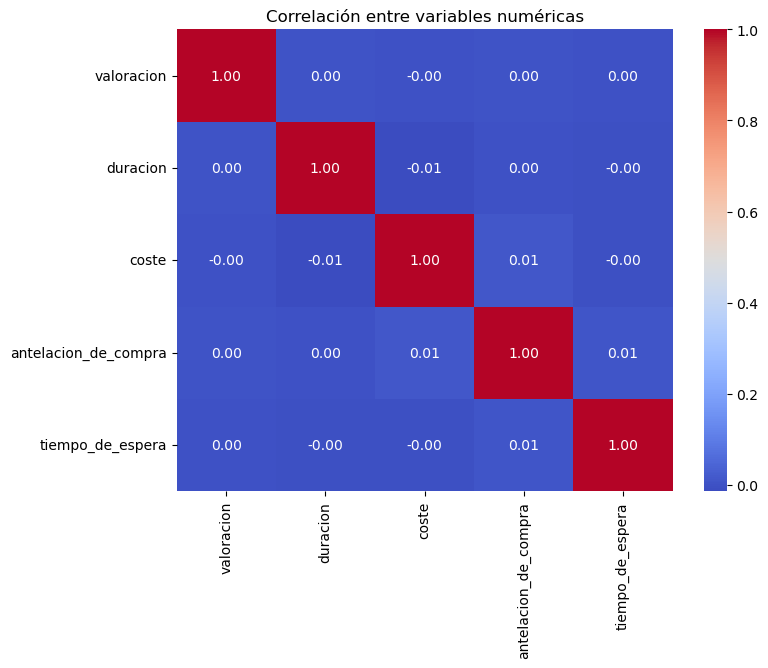

In [18]:
#analisis de correlacion entre las variables para ver cuales ayudan 
import seaborn as sns
import matplotlib.pyplot as plt

# Solo las variables num√©ricas
numeric_cols = ['valoracion', 'duracion', 'coste', 'antelacion_de_compra', 'tiempo_de_espera']

# Calcular la matriz de correlaci√≥n
corr_matrix = df[numeric_cols].corr()

# Graficar
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlaci√≥n entre variables num√©ricas')
plt.show()

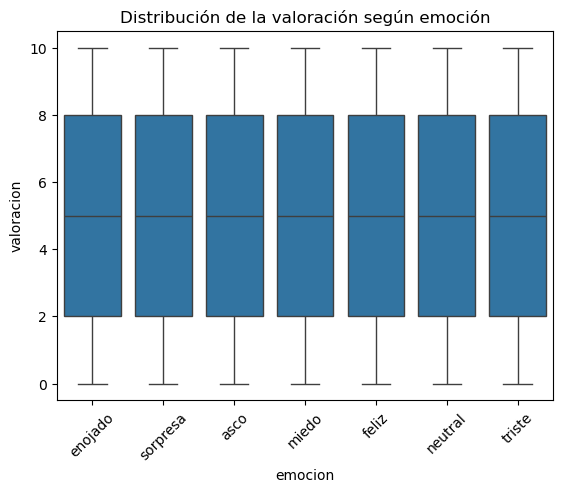

In [19]:
sns.boxplot(x='emocion', y='valoracion', data=df)
plt.title("Distribuci√≥n de la valoraci√≥n seg√∫n emoci√≥n")
plt.xticks(rotation=45)
plt.show()

In [12]:
#Probamos un modelo KNN
from sklearn.neighbors import KNeighborsClassifier
#Entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

#Evaluar el modelo
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.19780528981429377

Classification Report:
               precision    recall  f1-score   support

        asco       0.00      0.00      0.00       109
     enojado       0.14      0.12      0.13       981
       feliz       0.25      0.50      0.33      1780
       miedo       0.13      0.08      0.10      1015
     neutral       0.16      0.13      0.14      1228
    sorpresa       0.12      0.03      0.05       791
      triste       0.16      0.11      0.13      1204

    accuracy                           0.20      7108
   macro avg       0.14      0.14      0.13      7108
weighted avg       0.17      0.20      0.17      7108



C:\Users\anaco\anaconda3\envs\pontia-ml\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anaco\anaconda3\envs\pontia-ml\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anaco\anaconda3\envs\pontia-ml\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenar el modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Predecir
y_pred = rf.predict(X_test)

# Evaluar
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.16615081598199213

Classification Report:
               precision    recall  f1-score   support

        asco       0.02      0.03      0.03       109
     enojado       0.14      0.14      0.14       981
       feliz       0.24      0.22      0.23      1780
       miedo       0.13      0.14      0.14      1015
     neutral       0.18      0.17      0.18      1228
    sorpresa       0.10      0.11      0.10       791
      triste       0.16      0.17      0.17      1204

    accuracy                           0.17      7108
   macro avg       0.14      0.14      0.14      7108
weighted avg       0.17      0.17      0.17      7108

